In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import os

In [ ]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory

IMG_SIZE = 150
 
base_dir = "dataset_cats_dogs"
cat_dir = os.path.join(base_dir, "cats")
dog_dir = os.path.join(base_dir, "dogs")

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

train_dataset = image_dataset_from_directory(
    train_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(IMG_SIZE,IMG_SIZE), # All images have different sizes and will be resized to 150x150
    shuffle=False,
)

val_dataset = image_dataset_from_directory(
    val_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(IMG_SIZE,IMG_SIZE), # All images have different sizes and will be resized to 150x150
    shuffle=False,
)

test_dataset = image_dataset_from_directory(
    test_dir,  # This is the target directory
    labels="inferred", 
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(IMG_SIZE,IMG_SIZE), # All images have different sizes and will be resized to 150x150
    shuffle=False,
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Create data augmentation as a separate model
# data_augmentation = models.Sequential(
#     [
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(factor=0.5),
#         layers.RandomZoom(height_factor=0.2),
#         layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
#     ]
# )

# data_augmentation.training = True
 
# # Nest data augmentation model as a layer
 
# model_aug = models.Sequential()
# model_aug.add(data_augmentation)
# model_aug.add(layers.Rescaling(255, input_shape=(150, 150, 3)))
# model_aug.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model_aug.add(layers.MaxPooling2D((2, 2)))
# model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_aug.add(layers.MaxPooling2D((2, 2)))
# model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_aug.add(layers.MaxPooling2D((2, 2)))
# model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_aug.add(layers.MaxPooling2D((2, 2)))
# model_aug.add(layers.Flatten())
# model_aug.add(layers.Dense(512, activation='relu'))
# model_aug.add(layers.Dense(1, activation='sigmoid'))



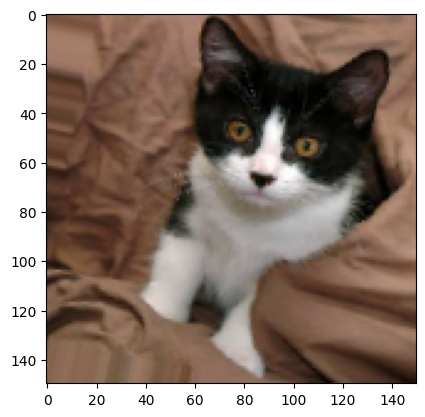

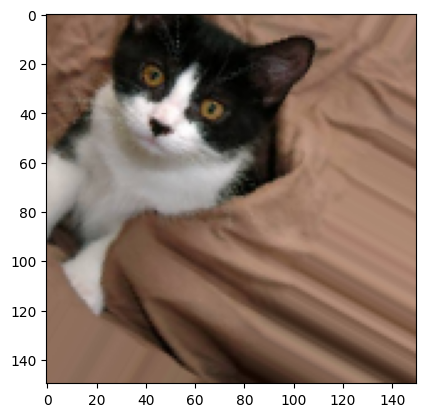

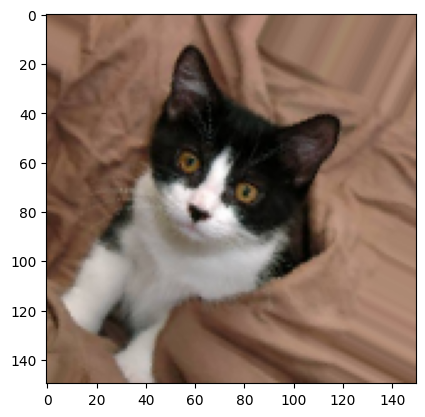

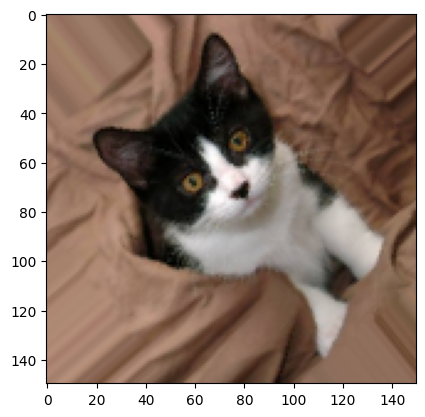

In [12]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

train_cats_dir = os.path.join(train_dir, "cats")

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
 
# We pick one image to "augment"
img_path = fnames[3]
 
# Read the image and resize it
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
 
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
 
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
 
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
 
plt.show()

## Data augmentation

In [13]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(IMG_SIZE, IMG_SIZE),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=20,
        class_mode='binary')

model_aug = models.Sequential()

model_aug.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(512, activation='relu'))
model_aug.add(layers.Dense(1, activation='sigmoid'))

model_aug.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_aug.summary()
 
history = model_aug.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 274ms/step - accuracy: 0.5137 - loss: 0.7704 - val_accuracy: 0.5160 - val_loss: 0.6917
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.5046 - loss: 0.6941 - val_accuracy: 0.5270 - val_loss: 0.6896
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 341ms/step - accuracy: 0.5511 - loss: 0.7005 - val_accuracy: 0.6130 - val_loss: 0.6766
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - accuracy: 0.5827 - loss: 0.6814 - val_accuracy: 0.6250 - val_loss: 0.6523
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.6169 - loss: 0.6626 - val_accuracy: 0.6240 - val_loss: 0.6379
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - accuracy: 0.6261 - loss: 0.6419 - val_accuracy: 0.6750 - val_loss: 0.6109
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.6477 - loss: 0.6318 - val_accuracy: 0.6410 - val_loss: 0.6262
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.6483 -

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


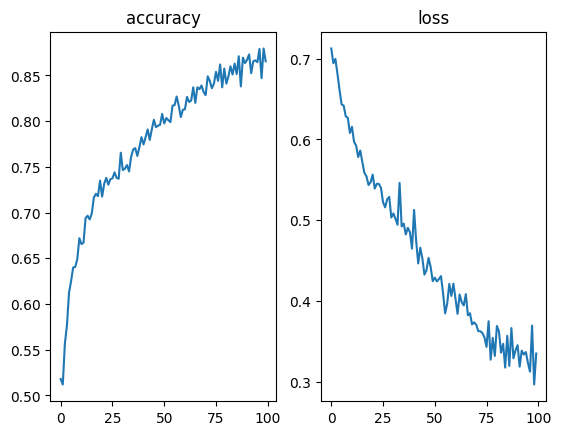

In [14]:
history_dict = history.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['loss'])
ax[1].set_title('loss')
plt.show()

## Dropout

In [15]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        train_dir,
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model_dropout = models.Sequential()

model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(512, activation='relu'))
model_dropout.add(layers.Dense(1, activation='sigmoid'))

model_dropout.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_dropout.summary()
 
history_dropout = model_dropout.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 269ms/step - accuracy: 0.4823 - loss: 0.7144 - val_accuracy: 0.5000 - val_loss: 0.9027
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.4797 - loss: 0.6968 - val_accuracy: 0.5350 - val_loss: 0.6900
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.5360 - loss: 0.6937 - val_accuracy: 0.6010 - val_loss: 0.6789
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.5751 - loss: 0.6805 - val_accuracy: 0.5800 - val_loss: 0.7583
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - accuracy: 0.5990 - loss: 0.6733 - val_accuracy: 0.6380 - val_loss: 0.6420
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.6382 - loss: 0.6405 - val_accuracy: 0.6600 - val_loss: 0.6130
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.6634 - loss: 0.6319 - val_accuracy: 0.5530 - val_loss: 0.8487
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 282ms/step - accuracy: 0.6442 -

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


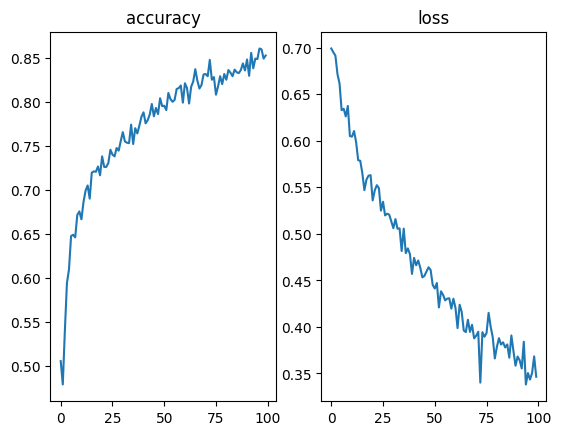

In [16]:
history_dict = history_dropout.history
print(history_dict.keys())

fig, ax = plt.subplots(1, 2)
ax[0].plot(history_dict['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history_dict['loss'])
ax[1].set_title('loss')
plt.show()